In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [6]:
transform= transforms.Compose([transforms.ToTensor(), 
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

training_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testing_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


trainLoader = DataLoader(training_data, batch_size=32, shuffle=True)
testLoader = DataLoader(testing_data, batch_size=32, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
class CNN(nn.Module):
    def __init__(self, num_classes=1):
        super(CNN, self).__init__()
        self.conv_layer1=nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv_layer3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.pool_layer = nn.MaxPool2d(2, 2)
        self.fullycon_layer1 = nn.Linear(128*4*4,512)
        self.fullycon_layer2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool_layer(F.relu(self.conv_layer1(x)))
        x = self.pool_layer(F.relu(self.conv_layer2(x)))
        x = self.pool_layer(F.relu(self.conv_layer3(x)))
        x = torch.flatten(x,1)
        x = F.relu(self.fullycon_layer1(x))
        x = self.fullycon_layer2(x)
        return x


    

In [8]:
net = CNN()

lossfn = nn.CrossEntropyLoss()

optimizer=optim.Adam(net.parameters(), lr=0.001)


In [9]:
t = 10
for epoch in range(t):
    current_loss = 0.
    for inputs, labels in trainLoader:
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = lossfn(outputs, labels)
        loss.backward()
        optimizer.step()

        current_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {current_loss / len(trainLoader)}")

Epoch 1, Loss: 1.2577650721303484
Epoch 2, Loss: 0.8366395098348497
Epoch 3, Loss: 0.6588076676074618
Epoch 4, Loss: 0.5232162234335852
Epoch 5, Loss: 0.4014551874228723
Epoch 6, Loss: 0.2951057173469016
Epoch 7, Loss: 0.21802882423716158
Epoch 8, Loss: 0.16387668517623777
Epoch 9, Loss: 0.1363627104522447
Epoch 10, Loss: 0.11976123748642707


In [10]:
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testLoader:
        outputs = net(inputs)
        _, predictions = torch.max(outputs,1)
        total += labels.size(0)
        correct += (predictions == labels).sum().item()
print(f'Accuracy on the 10000 test images: {100 * correct / total}%')



Accuracy on the 10000 test images: 74.4%


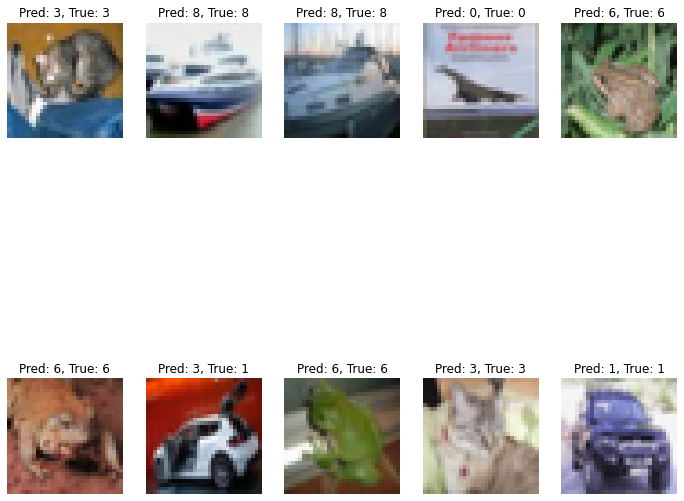

In [18]:
# Visualize predictions
dataiter = iter(testLoader)
for images, labels in dataiter:


    outputs = net(images)
    _, predicted = torch.max(outputs, 1)

    # Plot images and their predicted labels
    fig = plt.figure(figsize=(12, 12))
    for idx in range(10):
        ax = fig.add_subplot(2, 5, idx + 1)
        ax.imshow(images[idx].permute(1, 2, 0) / 2 + 0.5)  # Unnormalize
        ax.set_title(f"Pred: {predicted[idx].item()}, True: {labels[idx].item()}")
        ax.axis('off')
    plt.show()
    break